
# Data Analysis Task

## Background

*Event logging* (EL) is used to track a variety of performance and usage metrics to help on the decision making process. Specifically, the most used metrics are:

- *clickthrough rate*: the proportion of search sessions where the user clicked on one of the results displayed
- *zero results rate*: the proportion of searches that yielded 0 results

and other metrics outside the scope of this task. EL uses JavaScript to asynchronously send messages (events) to the servers when the user has performed specific actions. In this task, you will analyze a subset of our event logs.

## Task

You must create a **reproducible report**\* answering the following questions:

1. What is the daily overall clickthrough rate? How does it vary between the groups?
2. Which results do people tend to try first? How does it change day-to-day?
3. What is the daily overall zero results rate? How does it vary between the groups?
4. Let *session length* be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.
5. Summarize your findings in an *executive summary*.

## Data

Desktop users are randomly sampled to be anonymously tracked by this schema which uses a "I'm alive" pinging system that it is used to estimate how long users stay on the pages they visit. The dataset contains just a little more than a week of EL data.

| Column          | Value   | Description                                                                       |
|:----------------|:--------|:----------------------------------------------------------------------------------|
| uuid            | string  | Universally unique identifier (UUID) for backend event handling.                  |
| timestamp       | integer | The date and time (UTC) of the event, formatted as YYYYMMDDhhmmss.                |
| session_id      | string  | A unique ID identifying individual sessions.                                      |
| group           | string  | A label ("a" or "b").                                     |
| action          | string  | Identifies in which the event was created. See below.                             |
| checkin         | integer | How many seconds the page has been open for.                                      |
| page_id         | string  | A unique identifier for correlating page visits and check-ins.                    |
| n_results       | integer | Number of hits returned to the user. Only shown for searchResultPage events.      |
| result_position | integer | The position of the visited page's link on the search engine results page (SERP). |

The following are possible values for an event's action field:

- **searchResultPage**: when a new search is performed and the user is shown a SERP.
- **visitPage**: when the user clicks a link in the results.
- **checkin**: when the user has remained on the page for a pre-specified amount of time.

### Example Session

|uuid                             |      timestamp|session_id       |group |action           | checkin|page_id          | n_results| result_position|
|:--------------------------------|:--------------|:----------------|:-----|:----------------|-------:|:----------------|---------:|---------------:|
|4f699f344515554a9371fe4ecb5b9ebc | 20160305195246|001e61b5477f5efc |b     |searchResultPage |      NA|1b341d0ab80eb77e |         7|              NA|
|759d1dc9966353c2a36846a61125f286 | 20160305195302|001e61b5477f5efc |b     |visitPage        |      NA|5a6a1f75124cbf03 |        NA|               1|
|77efd5a00a5053c4a713fbe5a48dbac4 | 20160305195312|001e61b5477f5efc |b     |checkin          |      10|5a6a1f75124cbf03 |        NA|               1|
|42420284ad895ec4bcb1f000b949dd5e | 20160305195322|001e61b5477f5efc |b     |checkin          |      20|5a6a1f75124cbf03 |        NA|               1|
|8ffd82c27a355a56882b5860993bd308 | 20160305195332|001e61b5477f5efc |b     |checkin          |      30|5a6a1f75124cbf03 |        NA|               1|
|2988d11968b25b29add3a851bec2fe02 | 20160305195342|001e61b5477f5efc |b     |checkin          |      40|5a6a1f75124cbf03 |        NA|               1|

This user's search query returned 7 results, they clicked on the first result, and stayed on the page between 40 and 50 seconds. (The next check-in would have happened at 50s.)

Task 100% inspired by this one -> https://github.com/wikimedia-research/Discovery-Hiring-Analyst-2016

In [410]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [411]:
#reading data from csv
df=pd.read_csv('events_log.csv')
df.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [412]:
#checking is there any null value
df.isnull().any()

uuid               False
timestamp          False
session_id         False
group              False
action             False
checkin             True
page_id            False
n_results           True
result_position     True
dtype: bool

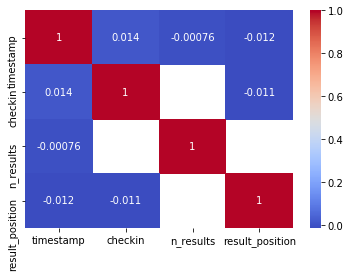

In [413]:
#drawing correlation matrix
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [414]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y%m%d%H%M%S')
df['e']=1
df.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,e
0,00000736167c507e8ec225bd9e71f9e5,2016-03-01 10:38:42,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN,1
1,00000c69fe345268935463abbfa5d5b3,2016-03-07 00:52:26,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN,1
2,00003bfdab715ee59077a3670331b787,2016-03-02 14:53:05,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN,1
3,0000465cd7c35ad2bdeafec953e08c1a,2016-03-02 22:27:01,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0,1
4,000050cbb4ef5b42b16c4d2cf69e6358,2016-03-02 09:50:23,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN,1


In [415]:
#Task no. 1.
#What is the daily overall clickthrough rate? How does it vary between the groups?
#CRT=clickedResults/allSearchResults
#group by Y(year), M(month), D(day), H(hour), Min(minute), S(sec)
grouping_date_parametr = 'D'
allSearchResults=df[df['action'] == 'searchResultPage'].groupby([pd.Grouper(key='timestamp', freq=grouping_date_parametr), 'group']).count()['e']
allSearchResults

timestamp   group
2016-03-01  a        12582
            b         5792
2016-03-02  a        13209
            b         5693
2016-03-03  a        13280
            b         5879
2016-03-04  a        11298
            b         5377
2016-03-05  a         8612
            b         4592
2016-03-06  a         9469
            b         5143
2016-03-07  a        12699
            b         6312
2016-03-08  a        10907
            b         5390
Name: e, dtype: int64

In [416]:
clickedResults=df[df['action'] == 'visitPage'].groupby([pd.Grouper(key='timestamp', freq=grouping_date_parametr), 'group']).count()['e']
clickedResults

timestamp   group
2016-03-01  a        5925
            b         729
2016-03-02  a        5932
            b         760
2016-03-03  a        5775
            b         799
2016-03-04  a        3381
            b         913
2016-03-05  a        2513
            b         810
2016-03-06  a        2901
            b         857
2016-03-07  a        3610
            b        1104
2016-03-08  a        3228
            b         870
Name: e, dtype: int64

In [417]:
CRT=clickedResults/allSearchResults
CRT

timestamp   group
2016-03-01  a        0.470911
            b        0.125863
2016-03-02  a        0.449088
            b        0.133497
2016-03-03  a        0.434864
            b        0.135907
2016-03-04  a        0.299257
            b        0.169797
2016-03-05  a        0.291802
            b        0.176394
2016-03-06  a        0.306368
            b        0.166634
2016-03-07  a        0.284274
            b        0.174905
2016-03-08  a        0.295957
            b        0.161410
Name: e, dtype: float64

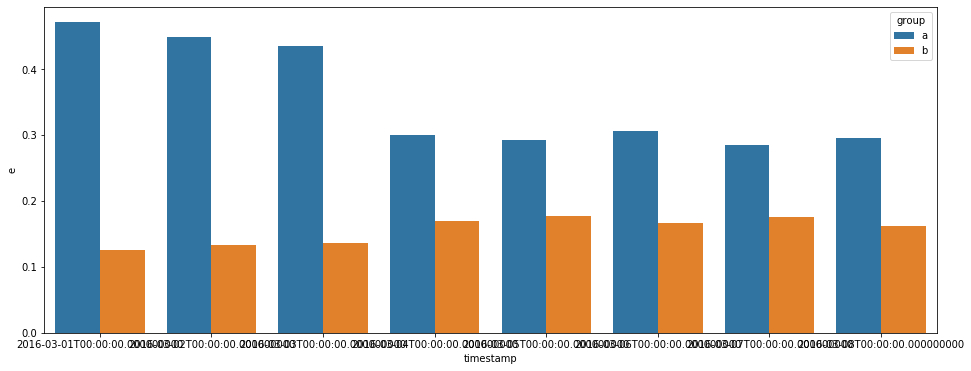

In [418]:
data=pd.DataFrame(CRT).reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='timestamp',y='e',hue='group',data=data)

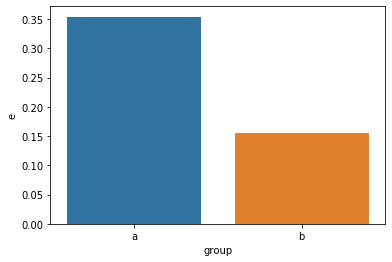

In [419]:
data=data.groupby('group').mean().reset_index()
sns.barplot(x='group',y='e',data=data)

In [420]:
#Task no.3.
#What is the daily overall zero results rate? How does it vary between the groups?
#ZRR=zeroSearchResults/allSearchResults
zeroSearchResults=df[df['n_results'] == 0].groupby([pd.Grouper(key='timestamp', freq=grouping_date_parametr), 'group']).count()['e']
zeroSearchResults

timestamp   group
2016-03-01  a        2350
            b        1097
2016-03-02  a        2524
            b        1065
2016-03-03  a        2371
            b        1072
2016-03-04  a        2068
            b         947
2016-03-05  a        1535
            b         907
2016-03-06  a        1599
            b         975
2016-03-07  a        2316
            b        1144
2016-03-08  a        2139
            b        1018
Name: e, dtype: int64

In [421]:
ZRR=zeroSearchResults/allSearchResults
ZRR

timestamp   group
2016-03-01  a        0.186775
            b        0.189399
2016-03-02  a        0.191082
            b        0.187072
2016-03-03  a        0.178539
            b        0.182344
2016-03-04  a        0.183041
            b        0.176121
2016-03-05  a        0.178240
            b        0.197517
2016-03-06  a        0.168867
            b        0.189578
2016-03-07  a        0.182377
            b        0.181242
2016-03-08  a        0.196113
            b        0.188868
Name: e, dtype: float64

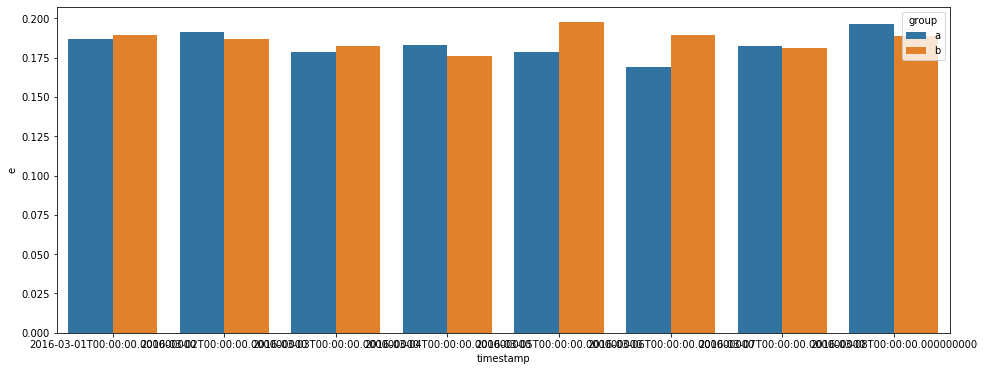

In [422]:
data=pd.DataFrame(ZRR).reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='timestamp',y='e',hue='group',data=data)

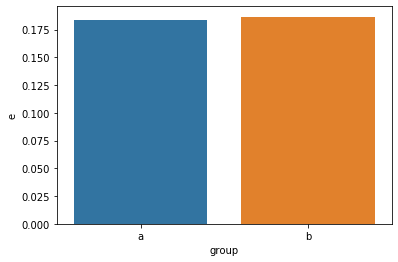

In [423]:
data=data.groupby('group').mean().reset_index()
sns.barplot(x='group',y='e',data=data)

In [424]:
#Task no. 2.
#Which results do people tend to try first? How does it change day-to-day?
tryFirst=df[df['action'] == 'visitPage'].groupby([pd.Grouper(key='timestamp', freq='S'),'session_id']).first()
tryFirst.head()

,,uuid,group,action,checkin,page_id,n_results,result_position,e
timestamp,session_id,,,,,,,,
2016-03-01 00:00:13,61e6cb95570e935e,a73412d99cea511a9290ee30d3730d33,a,visitPage,NaN,25f29cab87d2fdc2,NaN,2.0,1
2016-03-01 00:01:09,23ca1f966a29d591,54351b3fa84f5459a5966e14ce6d1cf8,a,visitPage,NaN,681469ad93cb79c7,NaN,10.0,1
2016-03-01 00:02:00,23ca1f966a29d591,066982583344570a957c868d0f1e01c1,a,visitPage,NaN,dca216592b74f00d,NaN,11.0,1
2016-03-01 00:02:02,286442a37ee8598f,42b726c6b2a0549b9485388baaf36e06,a,visitPage,NaN,0ca8366c634aed63,NaN,2.0,1
2016-03-01 00:02:18,882d1afe00573b91,88dd5e9cc3f85cacb4c05530d4074fbf,a,visitPage,NaN,e5c70d68467cf492,NaN,3.0,1


In [425]:
data=tryFirst.reset_index()[['timestamp','result_position','e']]
new_data=data.groupby([pd.Grouper(key='timestamp', freq='D'),'result_position']).count().reset_index()
new_data.head()

,timestamp,result_position,e
0,2016-03-01,1.0,2825
1,2016-03-01,2.0,674
2,2016-03-01,3.0,302
3,2016-03-01,4.0,177
4,2016-03-01,5.0,114


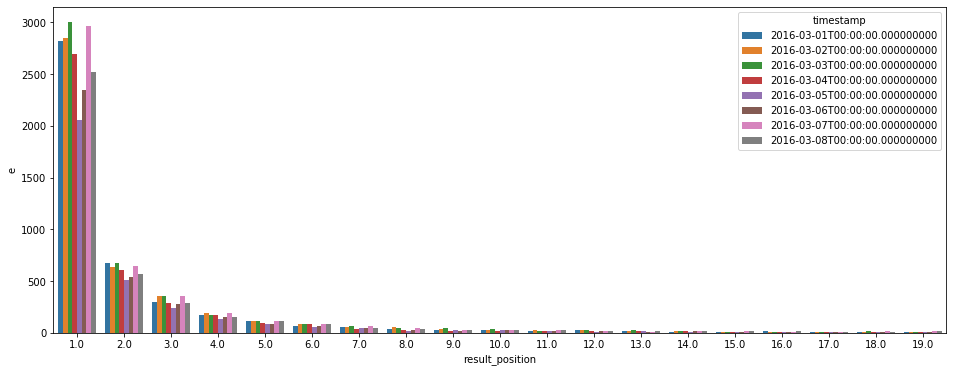

In [426]:
plt.figure(figsize=(16,6))
podaci=new_data[new_data['result_position']<20]
sns.barplot(x='result_position',y='e',hue='timestamp',data=podaci)

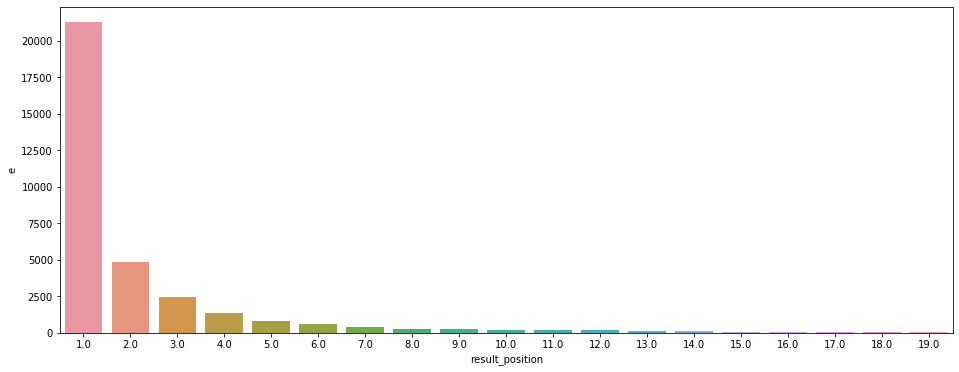

In [427]:
plt.figure(figsize=(16,6))
podaci=podaci.groupby('result_position').sum().reset_index()
sns.barplot(x='result_position',y='e',data=podaci)

In [428]:
#Task no. 4.
#Let session length be approximately the time between the first event and the last event in a session.
#Choose a variable from the dataset and describe its relationship to session length. Visualize the relationship.
begin = df.groupby(['session_id','timestamp']).count().reset_index().groupby(['session_id']).first().reset_index()[['session_id','timestamp']]
begin.head()

,session_id,timestamp
0,0000cbcb67c19c45,2016-03-03 15:20:45
1,0001382e027b2ea4,2016-03-07 08:49:55
2,0001e8bb90445cb2,2016-03-05 09:24:15
3,000216cf18ae1ab1,2016-03-08 16:19:46
4,000527f711d50dfc,2016-03-08 05:33:00


In [429]:
end = df.groupby(['session_id','timestamp']).count().reset_index().groupby(['session_id']).last().reset_index()[['session_id','timestamp']]
end.head()

,session_id,timestamp
0,0000cbcb67c19c45,2016-03-03 15:20:45
1,0001382e027b2ea4,2016-03-07 08:54:58
2,0001e8bb90445cb2,2016-03-05 09:31:30
3,000216cf18ae1ab1,2016-03-08 16:20:44
4,000527f711d50dfc,2016-03-08 05:33:00


In [430]:
session=pd.merge(begin, end, on='session_id')
session.head()

,session_id,timestamp_x,timestamp_y
0,0000cbcb67c19c45,2016-03-03 15:20:45,2016-03-03 15:20:45
1,0001382e027b2ea4,2016-03-07 08:49:55,2016-03-07 08:54:58
2,0001e8bb90445cb2,2016-03-05 09:24:15,2016-03-05 09:31:30
3,000216cf18ae1ab1,2016-03-08 16:19:46,2016-03-08 16:20:44
4,000527f711d50dfc,2016-03-08 05:33:00,2016-03-08 05:33:00


In [431]:
session['session_lenght']=session['timestamp_y']-session['timestamp_x']
session['e']=1
session.head()

,session_id,timestamp_x,timestamp_y,session_lenght,e
0,0000cbcb67c19c45,2016-03-03 15:20:45,2016-03-03 15:20:45,00:00:00,1
1,0001382e027b2ea4,2016-03-07 08:49:55,2016-03-07 08:54:58,00:05:03,1
2,0001e8bb90445cb2,2016-03-05 09:24:15,2016-03-05 09:31:30,00:07:15,1
3,000216cf18ae1ab1,2016-03-08 16:19:46,2016-03-08 16:20:44,00:00:58,1
4,000527f711d50dfc,2016-03-08 05:33:00,2016-03-08 05:33:00,00:00:00,1


In [432]:
def bin_f(x):
    x = x/np.timedelta64(1, 's')
    bins = [0,10,30,60,120,240,360,480,600,720,840,960,1080,1200]
    for b in bins:
        if x<=b:
            return b
session['bin']=session['session_lenght'].apply(lambda x: bin_f(x))

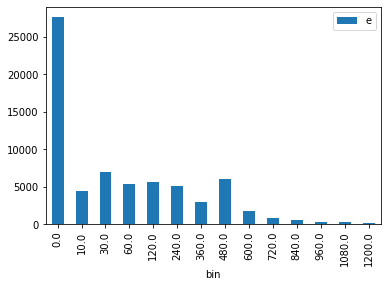

In [433]:
session[['e','bin']].groupby('bin').count().plot(kind='bar')

In [434]:
begin_group = df.groupby(['session_id','timestamp','group']).count().reset_index().groupby(['session_id']).first().reset_index()[['session_id','timestamp','group']]
begin_group.head()

,session_id,timestamp,group
0,0000cbcb67c19c45,2016-03-03 15:20:45,b
1,0001382e027b2ea4,2016-03-07 08:49:55,b
2,0001e8bb90445cb2,2016-03-05 09:24:15,b
3,000216cf18ae1ab1,2016-03-08 16:19:46,a
4,000527f711d50dfc,2016-03-08 05:33:00,b


In [435]:
end_group = df.groupby(['session_id','timestamp','group']).count().reset_index().groupby(['session_id']).last().reset_index()[['session_id','timestamp','group']]
end_group.head()

,session_id,timestamp,group
0,0000cbcb67c19c45,2016-03-03 15:20:45,b
1,0001382e027b2ea4,2016-03-07 08:54:58,b
2,0001e8bb90445cb2,2016-03-05 09:31:30,b
3,000216cf18ae1ab1,2016-03-08 16:20:44,a
4,000527f711d50dfc,2016-03-08 05:33:00,b


In [436]:
session_group=pd.merge(begin_group, end_group, on=['session_id','group'])
session_group.head()

,session_id,timestamp_x,group,timestamp_y
0,0000cbcb67c19c45,2016-03-03 15:20:45,b,2016-03-03 15:20:45
1,0001382e027b2ea4,2016-03-07 08:49:55,b,2016-03-07 08:54:58
2,0001e8bb90445cb2,2016-03-05 09:24:15,b,2016-03-05 09:31:30
3,000216cf18ae1ab1,2016-03-08 16:19:46,a,2016-03-08 16:20:44
4,000527f711d50dfc,2016-03-08 05:33:00,b,2016-03-08 05:33:00


In [437]:
session_group['session_lenght']=session_group['timestamp_y']-session_group['timestamp_x']
session_group['e']=1
session_group.head()

,session_id,timestamp_x,group,timestamp_y,session_lenght,e
0,0000cbcb67c19c45,2016-03-03 15:20:45,b,2016-03-03 15:20:45,00:00:00,1
1,0001382e027b2ea4,2016-03-07 08:49:55,b,2016-03-07 08:54:58,00:05:03,1
2,0001e8bb90445cb2,2016-03-05 09:24:15,b,2016-03-05 09:31:30,00:07:15,1
3,000216cf18ae1ab1,2016-03-08 16:19:46,a,2016-03-08 16:20:44,00:00:58,1
4,000527f711d50dfc,2016-03-08 05:33:00,b,2016-03-08 05:33:00,00:00:00,1


In [438]:
def bin_f(x):
    x = x/np.timedelta64(1, 's')
    bins = [0,10,30,60,120,240,360,480,600,720,840,960,1080,1200]
    for b in bins:
        if x<=b:
            return b
session_group['bin']=session_group['session_lenght'].apply(lambda x: bin_f(x))

In [439]:
session_group=session_group[['e','bin','group']].groupby(['bin','group']).count().reset_index()
session_group.head()

,bin,group,e
0,0.0,b,27606
1,10.0,a,2406
2,10.0,b,1976
3,30.0,a,4505
4,30.0,b,2425


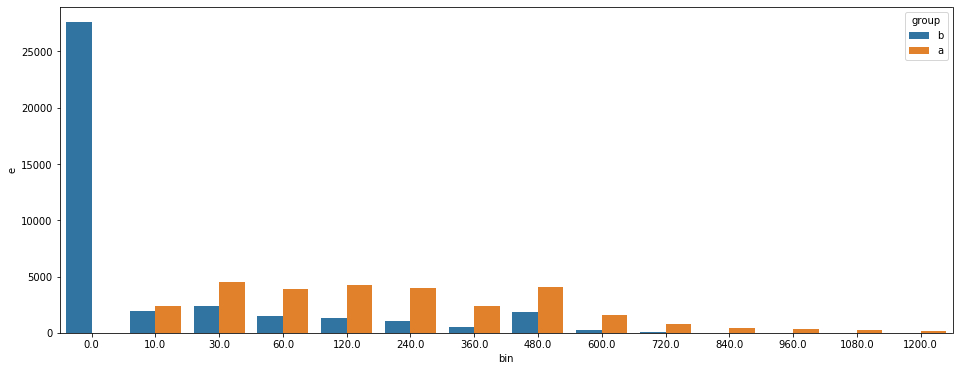

In [440]:
plt.figure(figsize=(16,6))
sns.barplot(x='bin',y='e',hue='group',data=session_group)

In [441]:
#check if all rows which has only one action is from group b
temp=pd.DataFrame(df.groupby(['session_id','group']).apply(lambda row: len(row))).reset_index()
temp[temp[0]==1]['group'].unique()

array(['b'], dtype=object)

In [442]:
temp[temp[0]==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27595 entries, 0 to 68025
Data columns (total 3 columns):
session_id    27595 non-null object
group         27595 non-null object
0             27595 non-null int64
dtypes: int64(1), object(2)
memory usage: 862.3+ KB


In [443]:
checkinLen=df.groupby(['session_id','page_id']).apply(lambda x: x['checkin'].max())
checkinLen=checkinLen.fillna(0).reset_index().groupby('session_id').sum()
checkinLen.head()

,0
session_id,
0000cbcb67c19c45,0.0
0001382e027b2ea4,300.0
0001e8bb90445cb2,420.0
000216cf18ae1ab1,0.0
000527f711d50dfc,0.0


In [444]:
searchLen=df.groupby(['session_id']).sum()['n_results']
searchLen.head()

session_id
0000cbcb67c19c45     20.0
0001382e027b2ea4     18.0
0001e8bb90445cb2     20.0
000216cf18ae1ab1    120.0
000527f711d50dfc      1.0
Name: n_results, dtype: float64

In [445]:
ses=pd.merge(session, searchLen, on=['session_id'])
ses=pd.merge(ses, checkinLen,on=['session_id'])
ses.head()

,session_id,timestamp_x,timestamp_y,session_lenght,e,bin,n_results,0
0,0000cbcb67c19c45,2016-03-03 15:20:45,2016-03-03 15:20:45,00:00:00,1,0.0,20.0,0.0
1,0001382e027b2ea4,2016-03-07 08:49:55,2016-03-07 08:54:58,00:05:03,1,360.0,18.0,300.0
2,0001e8bb90445cb2,2016-03-05 09:24:15,2016-03-05 09:31:30,00:07:15,1,480.0,20.0,420.0
3,000216cf18ae1ab1,2016-03-08 16:19:46,2016-03-08 16:20:44,00:00:58,1,60.0,120.0,0.0
4,000527f711d50dfc,2016-03-08 05:33:00,2016-03-08 05:33:00,00:00:00,1,0.0,1.0,0.0


In [446]:
ses['session_lenght_seconds']=ses['session_lenght'].apply(lambda x: x/np.timedelta64(1, 's'))
ses=ses[['bin','n_results',0,'session_lenght_seconds']]
ses.rename(columns={'n_results': 'total_results', 0: 'total_checkin'}, inplace=True)
ses.head()

,bin,total_results,total_checkin,session_lenght_seconds
0,0.0,20.0,0.0,0.0
1,360.0,18.0,300.0,303.0
2,480.0,20.0,420.0,435.0
3,60.0,120.0,0.0,58.0
4,0.0,1.0,0.0,0.0


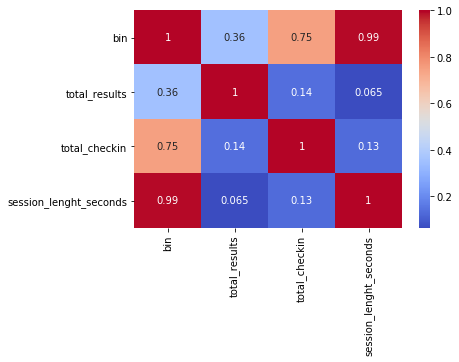

In [447]:
sns.heatmap(ses[['bin','total_results','total_checkin','session_lenght_seconds']].corr(),cmap='coolwarm',annot=True)

# Summary
* group A has bigger clickthrough rate compared to group B
* groups A and B have almost the same zero results rate
* most of the visited pages, were the 1st one, suggested after the search action was performed
* only people from group b, were doing one action per session
* most of the sessions had time lenghts between 1s and 480 sec
* there is small relation between session lenght and total checkin lenght
* seems like there is big correlation between total_search_results and total_checkin_time with custom made bins
